In [29]:
import numpy as np
import pickle
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
pmt_info = pickle.load(open('/home/jpyanez/snoplus/snoplus_python/pmt_positions.pckl'))
pmt_radii = np.linalg.norm(pmt_info['xyz'], axis=1)
costheta = pmt_info['xyz'][:,2]/pmt_radii
phi      = np.arctan2(pmt_info['xyz'][:,1], 
                      pmt_info['xyz'][:,0])

In [52]:
effective_n = 1.4
ch_angle = np.arccos(1/effective_n)
c  = np.tan(ch_angle/2.)
print np.rad2deg(ch_angle), c

0.408248290464
44.4153085972 0.408248290464


In [67]:
direction = np.array([0.3, 0.4, 0.2])
normdir = direction/np.linalg.norm(direction)
position  = np.array([0., 5000., 4000.])

In [ ]:
# Have to figure out how to do this properly

In [ ]:
# Defining the rotation angles
N = np.cross(np.array(0,0,1), np.array(0,0,direction[2]))
alpha = np.arccos(direction[2])
beta = np.arccos(np.dot(np.array(1,0,0),N))
gamma = np.arccos(np.dog(N, np.array()))

In [ ]:
# Need to rotate so that it points towards POSITIVE Z
# Making use that R = 1
zenith = np.arctan(direction[1]/direction[0])
azimuth = 

In [ ]:
# Need to rotate the p0 position as well as all the PMT positions to do the calculation.
# select pmts_cone and then plot those

In [68]:
x0 = position[0]
y0 = position[1]
z0 = position[2]

In [69]:
def ConeZ2(x,y):
    # This returns (z-z0)**2
    z2 = ((x-x0)**2 + (y-y0)**2)/c**2
    return np.sqrt(z2)+z0, -np.sqrt(z2)+z0

In [76]:
z1, z2 = ConeZ2(pmt_info['xyz'][:,0], pmt_info['xyz'][:,1])
diff_pos = np.abs(pmt_info['xyz'][:,2] - z1)
diff_neg = np.abs(pmt_info['xyz'][:,2] - z2)

tolerance = 300.
pmts_cone = (diff_pos<tolerance)+(diff_neg<tolerance)

In [77]:
np.sum(pmts_cone)

98

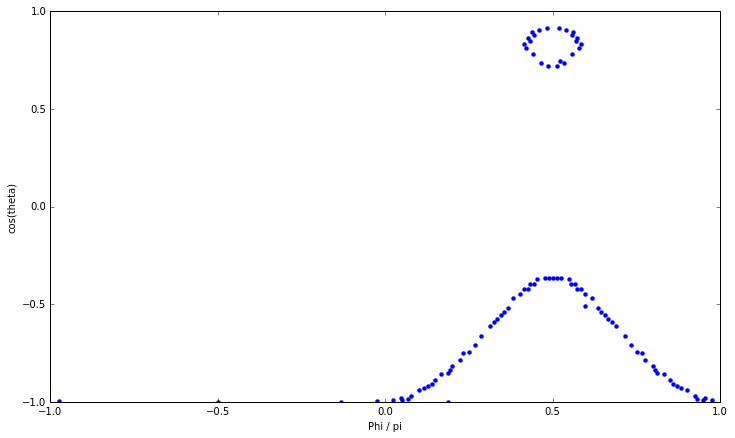

In [78]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
plt.scatter(phi[pmts_cone]/np.pi, costheta[pmts_cone],
            marker='o',lw = 0)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel('Phi / pi')
plt.ylabel('cos(theta)')
plt.show()